In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [70]:
data=pd.read_csv("/content/train_loan.csv")

In [71]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [72]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [73]:
data.duplicated().sum()


np.int64(0)

In [74]:
data.notnull().sum()

,0
Loan_ID,614
Gender,601
Married,611
Dependents,599
Education,614
Self_Employed,582
ApplicantIncome,614
CoapplicantIncome,614
LoanAmount,592
Loan_Amount_Term,600


In [75]:
#Mode works best when one category is clearly dominant.
#If categories are balanced, filling with mode may bias the dataset.
#checking the count of null values
print(data['Gender'].value_counts())
print(data['Married'].value_counts())
print(data['Dependents'].value_counts())
print(data['Self_Employed'].value_counts())

Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64


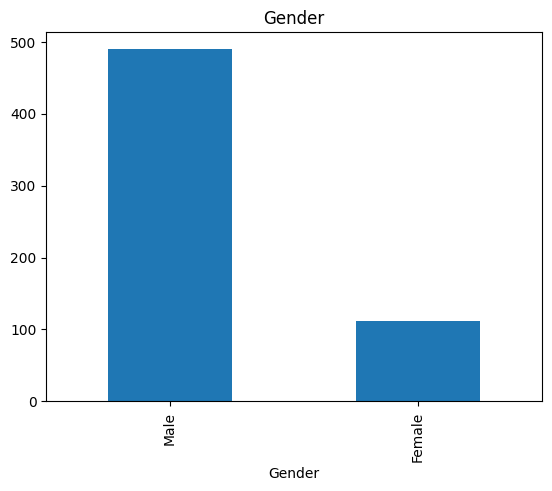

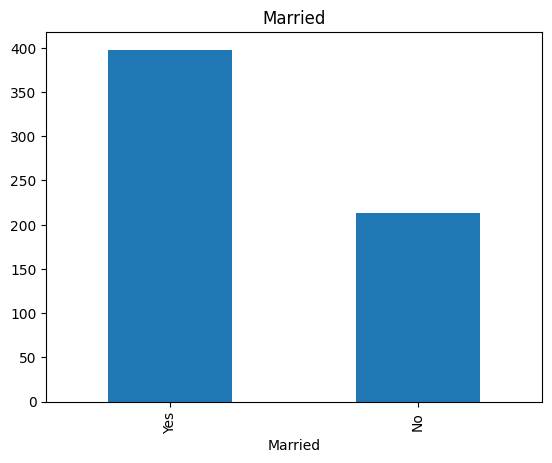

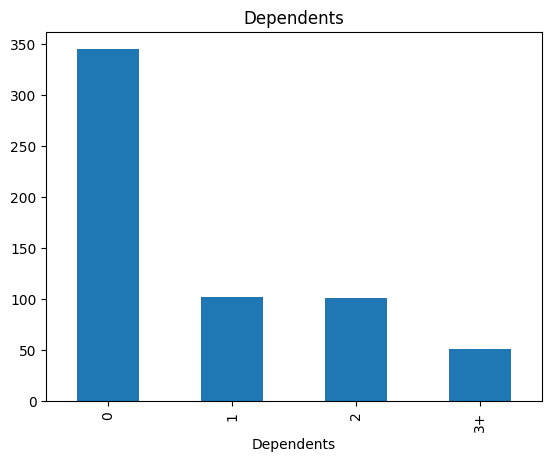

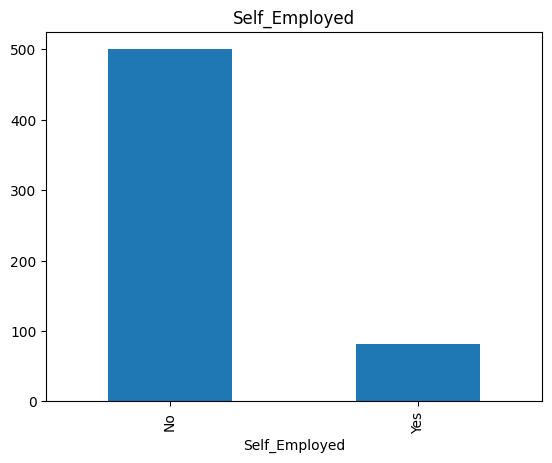

In [76]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_cols:
    data[col].value_counts().plot(kind='bar', title=col)
    plt.show()

In [77]:
#filling self employemnet with no and rest of categorical with mode
# Define categorical columns
ccols = ['Gender', 'Married', 'Dependents', 'Self_Employed']

for col in ccols:
    if col == 'Self_Employed':
        # Fill Self_Employed with "No"
        data[col].fillna('No', inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)


/tmp/ipython-input-3776036950.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
/tmp/ipython-input-3776036950.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

filling the numerical columns

In [78]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [79]:
#checking skewness in numerical columns to decide to  fill na with mean or median
for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    print(col, "skewness:", data[col].skew())


LoanAmount skewness: 2.677551679256059
Loan_Amount_Term skewness: -2.362414124216269
Credit_History skewness: -1.8823610612186696


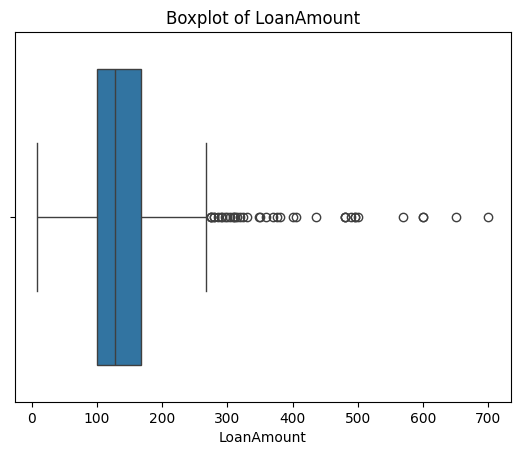

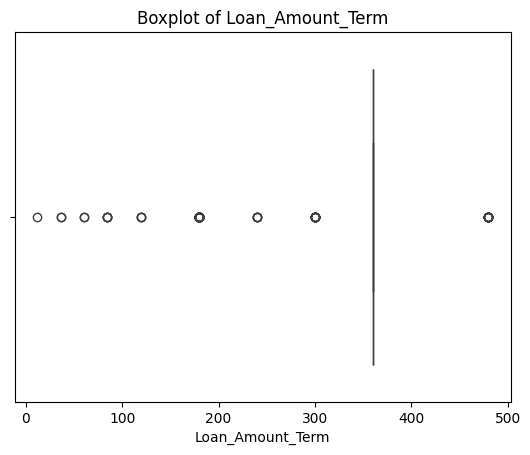

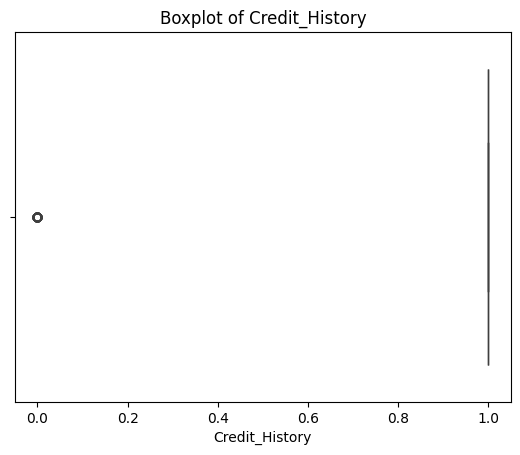

In [80]:
for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [81]:
#skenessLoanAmount
#Skewness = 2.68
#Boxplot: Strong outliers (very high loan amounts).
#Fill missing values with median, not mean.
#Loan_Amount_Term
#Skewness = -2.36 (negatively skewed)
#Values mostly 360 months, few at 180, 120, etc.
#Boxplot shows almost all values clustered at 360.
#This is categorical-like → fill with mode (360).
#Credit_History
#Skewness = -1.88
#Values are binary (0 or 1), majority = 1.
#Boxplot just shows two points.
#Fill with mode (1).

In [82]:
# Numerical columns and their preferred method
numerical_fill_methods = {
    'LoanAmount': 'median',
    'Loan_Amount_Term': 'mode',
    'Credit_History': 'mode'
}

for col, method in numerical_fill_methods.items():
    if method == 'median':
        data[col].fillna(data[col].median(), inplace=True)
    elif method == 'mode':
        data[col].fillna(data[col].mode()[0], inplace=True)

/tmp/ipython-input-3932808667.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
/tmp/ipython-input-3932808667.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [83]:
data.isnull().sum()


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


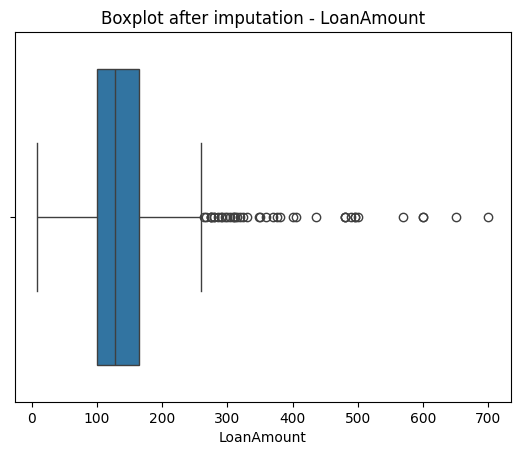

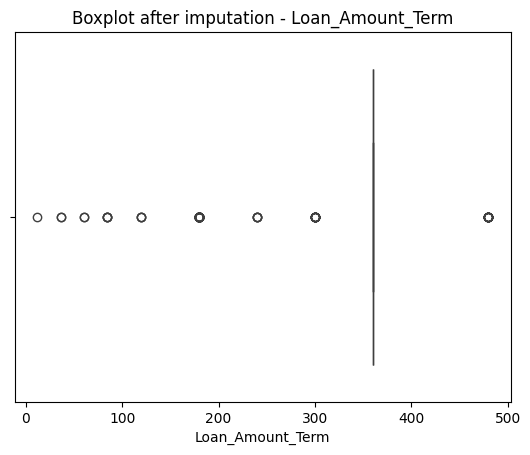

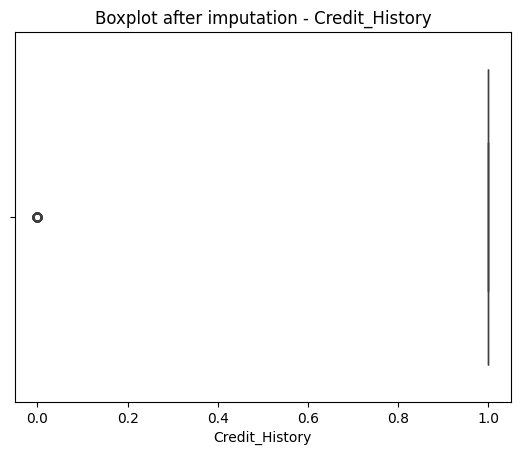

In [84]:
for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot after imputation - {col}")
    plt.show()

In [85]:
Q1 = data['LoanAmount'].quantile(0.25)
Q3 = data['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

data['LoanAmount'] = np.where(data['LoanAmount'] > upper_limit, upper_limit,
                     np.where(data['LoanAmount'] < lower_limit, lower_limit, data['LoanAmount']))

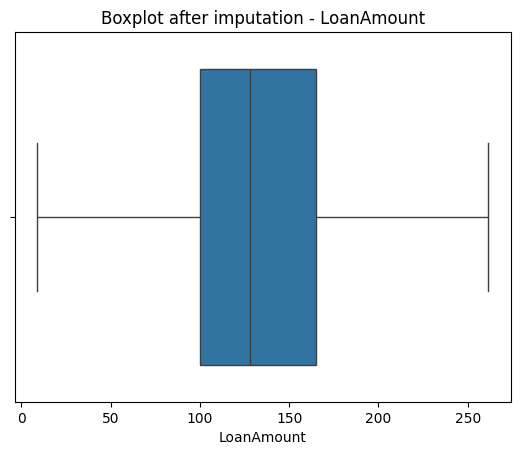

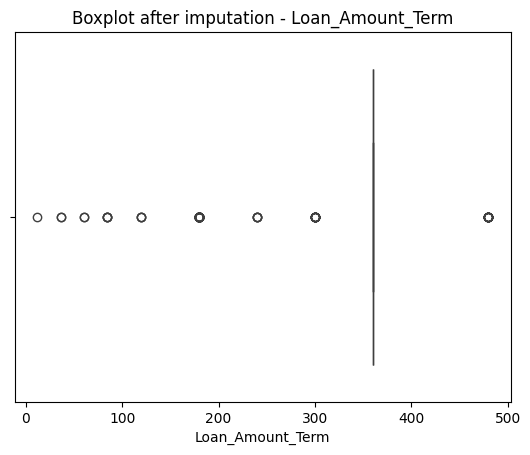

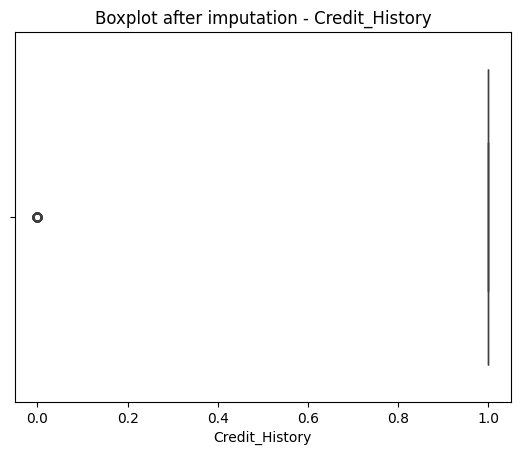

In [86]:
for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot after imputation - {col}")
    plt.show()

In [87]:
#encode target variables
#label encoding for loan status since it contain y/n values replace with 0,1

data['Dependents'] = data['Dependents'].replace('3+', 3).astype(int)

# Label encode target
le = LabelEncoder()
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])


one_hot_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
data = pd.get_dummies(data, columns=one_hot_cols, drop_first=True)

print("Columns after encoding:", data.columns.tolist())

Columns after encoding: ['Loan_ID', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male', 'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban']


In [88]:
for col in data.columns:
    if data[col].dtype == 'bool':
        data[col] = data[col].astype(int)
data.drop('Loan_ID', axis=1, inplace=True)

print(data.dtypes)

Dependents                   int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Gender_Male                  int64
Married_Yes                  int64
Education_Not Graduate       int64
Self_Employed_Yes            int64
Property_Area_Semiurban      int64
Property_Area_Urban          int64
dtype: object


In [89]:
print(data.head())
print(data.dtypes)

   Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0           0             5849                0.0       128.0   
1           1             4583             1508.0       128.0   
2           0             3000                0.0        66.0   
3           0             2583             2358.0       120.0   
4           0             6000                0.0       141.0   

   Loan_Amount_Term  Credit_History  Loan_Status  Gender_Male  Married_Yes  \
0             360.0             1.0            1            1            0   
1             360.0             1.0            0            1            1   
2             360.0             1.0            1            1            1   
3             360.0             1.0            1            1            1   
4             360.0             1.0            1            1            0   

   Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  \
0                       0                  0                       

In [90]:
#scaling numeric values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols_for_scaling = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
data[num_cols_for_scaling] = scaler.fit_transform(data[num_cols_for_scaling])

# quick check
data[num_cols_for_scaling].describe().round(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000,614.000,614.000,614.000
mean,-0.000,0.000,0.000,0.000
std,1.001,1.001,1.001,1.001
min,-0.861,-0.554,-2.303,-5.132
25%,-0.414,-0.554,-0.666,0.273
50%,-0.261,-0.148,-0.168,0.273
75%,0.064,0.231,0.491,0.273
max,12.385,13.696,2.227,2.137
